<a href="https://colab.research.google.com/github/angel870326/Monthly-Revenue-Forecasting/blob/main/007_data_cleaning_final_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2023.03.23 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

# **Data Cleaning**

### Contents

1.  Original Data
    *   月營收資料
    *   TSE 產業別
2.  Data Cleaning
    *   刪除 KY 和 DR 公司
    *   刪除特定產業（生技醫療、建材營造）
    *   初步刪除缺失值過多的月份
    *   起始年份測試
    *   起始年份：2015
    *   刪除月營收有空值的公司
    *   刪除任何擁有月營收小於等於 0 的公司
3.  通信網路業
    *   刪除 KY 和 DR 公司
    *   刪除缺失值過多的月份
    *   刪除月營收有空值的公司
    *   刪除任何擁有月營收小於等於 0 的公司
4.  Final Data






In [1]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **1. Original Data**

資料名稱：月營收盈餘

資料期間：1988年1月至2022年12月

資料範圍：上市、櫃公司（非金融業）

資料來源：TEJ Company DB、公開資訊觀測站

In [3]:
# Data path
original_data_path = '/content/gdrive/Shareddrives/Me/論文/資料集/005_v1'

### **1.1 月營收資料**

In [4]:
org_data = pd.read_excel(os.path.join(original_data_path, '198801-202212上市櫃公司月營收_非金融業_final.xlsx'), index_col=0)
org_data

,1988-01,1988-02,1988-03,1988-04,1988-05,1988-06,1988-07,1988-08,1988-09,1988-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,1023366.0,776330.0,949653.0,934508.0,956722.0,962288.0,965689.0,906975.0,867808.0,962648.0,...,9971650.0,8319342.0,7733787.0,9145989.0,10102468.0,10689860.0,10404901,11368096,9674576,12584154
1102 亞泥,669609.0,469482.0,623179.0,670191.0,769070.0,668979.0,677471.0,658859.0,625047.0,602687.0,...,8160414.0,8710220.0,8000427.0,7776413.0,7864622.0,7069221.0,6994078,7601097,8306062,8340507
1103 嘉泥,274577.0,193507.0,248228.0,237091.0,258996.0,231139.0,234409.0,229682.0,208783.0,294174.0,...,220463.0,168089.0,163521.0,183177.0,178825.0,182371.0,205264,209429,221763,228644
1104 環泥,218501.0,142580.0,186419.0,185271.0,200967.0,207478.0,179686.0,156646.0,155726.0,228700.0,...,591593.0,638493.0,537082.0,573028.0,580420.0,605512.0,597159,634981,631827,725055
1108 幸福,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,345612.0,335518.0,332258.0,334113.0,326691.0,390053.0,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,374229.0,302262.0,323433.0,371791.0,337581.0,468608.0,464373,432835,500111,506796
9955 佳龍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96200.0,101850.0,95096.0,80726.0,85625.0,81881.0,79179,80630,91270,84115
9958 世紀鋼,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,626104.0,401960.0,673479.0,665459.0,651699.0,757968.0,903198,911834,944060,1082675


In [5]:
print("Data shape:", org_data.shape)
print("Data size:", org_data.size)

Data shape: (1738, 420)
Data size: 729960


### **1.2 TSE 產業別**

from 001_data_partitioning_v1.ipynb

In [6]:
industry = pd.read_excel('/content/gdrive/MyDrive/論文/資料集/001_v1/上市櫃公司TSE產業.xlsx')
industry

,公司簡稱,TSE 產業別,TSE舊產業_名稱,TSE新產業_名稱
0,1101 台泥,1,水泥工業,水泥工業
1,1102 亞泥,1,水泥工業,水泥工業
2,1103 嘉泥,1,水泥工業,水泥工業
3,1104 環泥,1,水泥工業,水泥工業
4,1108 幸福,1,水泥工業,水泥工業
...,...,...,...,...
1783,9949 琉園,32,文化創意業,文化創意業
1784,9950 萬國通,3,塑膠工業,塑膠工業
1785,9951 皇田,5,電機機械,電機機械
1786,9960 邁達康,18,貿易百貨,貿易百貨


In [7]:
# 看一下 TSE 有哪些產業類別
industryCounts = industry[['TSE新產業_名稱']].value_counts().reset_index(name='counts')
industryCounts

,TSE新產業_名稱,counts
0,電子零組件,204
1,半導體,175
2,其他,137
3,生技醫療,129
4,光電業,117
5,電腦及週邊,109
6,電機機械,96
7,通信網路業,92
8,其他電子業,88
9,建材營造,79


## **2. Data Cleaning**

### **2.1 刪除 KY 和 DR 公司**

In [8]:
data = org_data[(org_data.index.str.contains('[KY]') == False) & (org_data.index.str.contains('[DR]') == False)] 
print("Data shape:", data.shape)
print("Data size:", data.size)

Data shape: (1630, 420)
Data size: 684600


### **2.2 刪除特定產業（生技醫療、建材營造）**

In [9]:
# Company list for an industry
def companyList(industryName: str):
  cList = industry[industry['TSE新產業_名稱'] == industryName]['公司簡稱'].tolist()
  return cList

# Remove companies in an industry
def removeIndustry(originalD: pd.DataFrame, industryName: str):
  cList = companyList(industryName)
  filter = originalD.index.isin(cList)
  print("{}:{}間".format(industryName, filter.sum()))
  newD = originalD.loc[~filter,:]
  print("New data shape:", newD.shape) # Number of companies and months
  print("New data size:", newD.size)
  return newD

In [10]:
data = removeIndustry(data, '生技醫療')

生技醫療:116間
New data shape: (1514, 420)
New data size: 635880


In [11]:
data = removeIndustry(data, '建材營造')

建材營造:76間
New data shape: (1438, 420)
New data size: 603960


### **2.3 初步刪除缺失值過多的月份**

最後留下 2002-01 至 2022-12 的資料

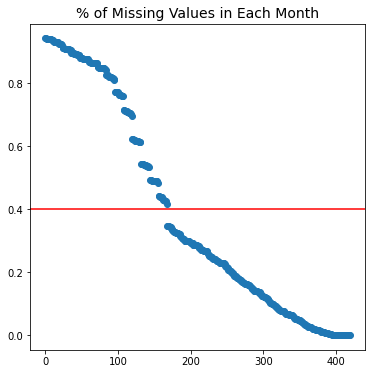

In [12]:
# Check if there is NaN in each month
month_nan = pd.DataFrame(data.isnull().sum(), columns=['nan_count'])
month_nan['nan_percent'] = month_nan['nan_count'] / len(data)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(range(0, month_nan.shape[0]), month_nan['nan_percent'])
plt.axhline(y=0.4, color='r', linestyle='-')
plt.title("% of Missing Values in Each Month", size=14)
plt.show()

橫軸由左至右為1988/01至2022/12，縱軸為該月份缺失值佔比。<br>

缺失值佔比約在 40% 出現斷層，因此首先刪除缺失值佔 40% 以上的月份。

In [13]:
# Months with more than 40% missing values
month_nan_40up = month_nan[month_nan['nan_percent'] > 0.4]
month_nan_droplist = month_nan_40up.index
month_nan_droplist

Index(['1988-01', '1988-02', '1988-03', '1988-04', '1988-05', '1988-06',
       '1988-07', '1988-08', '1988-09', '1988-10',
       ...
       '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08',
       '2001-09', '2001-10', '2001-11', '2001-12'],
      dtype='object', length=168)

缺失佔比 40% 以上的月份為 1988-01 至 2001-12。

(1438, 252)


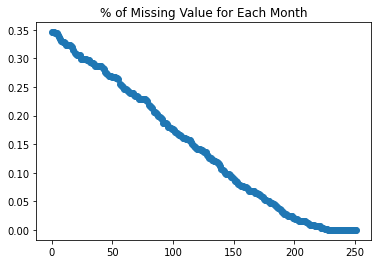

In [14]:
# Data after removing months with more than 40% missing values (data)
data = data.drop(month_nan_droplist, axis = 1)
print(data.shape)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(0, month_nan[month_nan['nan_percent'] < 0.4].shape[0]), month_nan[month_nan['nan_percent'] < 0.4]['nan_percent'])
plt.title("% of Missing Value for Each Month")
plt.show()

### **2.4 起始年份測試**

In [15]:
# 起始月：2002-01 至 2015-01
year_test = [[]]
for i in range(0, 168, 12):
  new_data = data.iloc[:, i:]
  remain = new_data.dropna(axis=0)
  year_test.append([new_data.columns[0], new_data.shape[0], new_data.size, remain.shape[0], remain.size])

year_test = pd.DataFrame(year_test, columns=['Start', '公司數', 'Data size', '公司數 without NaN', 'Data size without NaN']).iloc[1:,]
year_test

,Start,公司數,Data size,公司數 without NaN,Data size without NaN
1,2002-01,1438.0,362376.0,941.0,237132.0
2,2003-01,1438.0,345120.0,973.0,233520.0
3,2004-01,1438.0,327864.0,1009.0,230052.0
4,2005-01,1438.0,310608.0,1025.0,221400.0
5,2006-01,1438.0,293352.0,1052.0,214608.0
6,2007-01,1438.0,276096.0,1083.0,207936.0
7,2008-01,1438.0,258840.0,1108.0,199440.0
8,2009-01,1438.0,241584.0,1141.0,191688.0
9,2010-01,1438.0,224328.0,1178.0,183768.0
10,2011-01,1438.0,207072.0,1206.0,173664.0


### **2.5 起始年份：2015**
自 2015 年開始所有公司皆應依 IFRS 編製財務報告

In [16]:
# data_final = data.iloc[:, 132:]  # 2013
data_final = data.iloc[:, 156:]  # 2015
data_final

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,8921719.0,4823318.0,7695107.0,8468346.0,7989971.0,8545853.0,8250361.0,7397417.0,7026214.0,8081068.0,...,9971650.0,8319342.0,7733787.0,9145989.0,10102468.0,10689860.0,10404901,11368096,9674576,12584154
1102 亞泥,6851825.0,3279346.0,5274419.0,5767824.0,5623713.0,5516532.0,5746639.0,5512417.0,5546527.0,5901983.0,...,8160414.0,8710220.0,8000427.0,7776413.0,7864622.0,7069221.0,6994078,7601097,8306062,8340507
1103 嘉泥,310280.0,160324.0,200719.0,273126.0,320563.0,143719.0,175596.0,184087.0,189109.0,321446.0,...,220463.0,168089.0,163521.0,183177.0,178825.0,182371.0,205264,209429,221763,228644
1104 環泥,520536.0,335531.0,471332.0,447811.0,371720.0,411286.0,412816.0,376087.0,423675.0,461991.0,...,591593.0,638493.0,537082.0,573028.0,580420.0,605512.0,597159,634981,631827,725055
1108 幸福,518826.0,341533.0,431529.0,432670.0,471084.0,441613.0,463001.0,329405.0,340734.0,396102.0,...,345612.0,335518.0,332258.0,334113.0,326691.0,390053.0,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,284990.0,251041.0,279617.0,333189.0,321941.0,300731.0,289975.0,300810.0,347401.0,333945.0,...,374229.0,302262.0,323433.0,371791.0,337581.0,468608.0,464373,432835,500111,506796
9955 佳龍,301850.0,131575.0,325762.0,152812.0,262623.0,193277.0,102874.0,172944.0,172431.0,177217.0,...,96200.0,101850.0,95096.0,80726.0,85625.0,81881.0,79179,80630,91270,84115
9958 世紀鋼,200493.0,217812.0,272212.0,194423.0,235272.0,271207.0,184345.0,272110.0,256634.0,282106.0,...,626104.0,401960.0,673479.0,665459.0,651699.0,757968.0,903198,911834,944060,1082675


In [17]:
# Check if there is NaN
data_final.isnull().sum().sum()

3662

In [18]:
print("Data shape:", data_final.shape)
print("Data size:", data_final.size)

Data shape: (1438, 96)
Data size: 138048


### **2.6 刪除月營收有空值的公司**

In [19]:
# Drop all the rows with NaN values
data_final = data_final.dropna(axis=0)
data_final

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,8921719.0,4823318.0,7695107.0,8468346.0,7989971.0,8545853.0,8250361.0,7397417.0,7026214.0,8081068.0,...,9971650.0,8319342.0,7733787.0,9145989.0,10102468.0,10689860.0,10404901,11368096,9674576,12584154
1102 亞泥,6851825.0,3279346.0,5274419.0,5767824.0,5623713.0,5516532.0,5746639.0,5512417.0,5546527.0,5901983.0,...,8160414.0,8710220.0,8000427.0,7776413.0,7864622.0,7069221.0,6994078,7601097,8306062,8340507
1103 嘉泥,310280.0,160324.0,200719.0,273126.0,320563.0,143719.0,175596.0,184087.0,189109.0,321446.0,...,220463.0,168089.0,163521.0,183177.0,178825.0,182371.0,205264,209429,221763,228644
1104 環泥,520536.0,335531.0,471332.0,447811.0,371720.0,411286.0,412816.0,376087.0,423675.0,461991.0,...,591593.0,638493.0,537082.0,573028.0,580420.0,605512.0,597159,634981,631827,725055
1108 幸福,518826.0,341533.0,431529.0,432670.0,471084.0,441613.0,463001.0,329405.0,340734.0,396102.0,...,345612.0,335518.0,332258.0,334113.0,326691.0,390053.0,346635,401202,383773,418326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,284990.0,251041.0,279617.0,333189.0,321941.0,300731.0,289975.0,300810.0,347401.0,333945.0,...,374229.0,302262.0,323433.0,371791.0,337581.0,468608.0,464373,432835,500111,506796
9955 佳龍,301850.0,131575.0,325762.0,152812.0,262623.0,193277.0,102874.0,172944.0,172431.0,177217.0,...,96200.0,101850.0,95096.0,80726.0,85625.0,81881.0,79179,80630,91270,84115
9958 世紀鋼,200493.0,217812.0,272212.0,194423.0,235272.0,271207.0,184345.0,272110.0,256634.0,282106.0,...,626104.0,401960.0,673479.0,665459.0,651699.0,757968.0,903198,911834,944060,1082675


In [20]:
# Check if there is NaN
data_final.isnull().sum().sum()

0

In [21]:
print("Data shape:", data_final.shape)
print("Data size:", data_final.size)

Data shape: (1328, 96)
Data size: 127488


### **2.7 刪除任何擁有月營收小於等於 0 的公司**

In [22]:
data_final = data_final[data_final > 0].dropna(axis=0)
print("Data shape:", data_final.shape)
print("Data size:", data_final.size)

Data shape: (1308, 96)
Data size: 125568


## **3. 通信網路業**

In [23]:
communications_list = companyList('通信網路業')
org_communications = org_data.loc[org_data.index.isin(communications_list),:]
print("New data shape:", org_communications.shape)
print("New data size:", org_communications.size)

New data shape: (92, 420)
New data size: 38640


### **3.1 刪除 KY 和 DR 公司**

In [24]:
communications = org_communications[(org_communications.index.str.contains('[KY]') == False) & (org_communications.index.str.contains('[DR]') == False)] 
print("Data shape:", communications.shape)
print("Data size:", communications.size)

Data shape: (89, 420)
Data size: 37380


### **3.2 刪除缺失值過多的月份**

最後留下 2002-01 至 2022-12 的資料

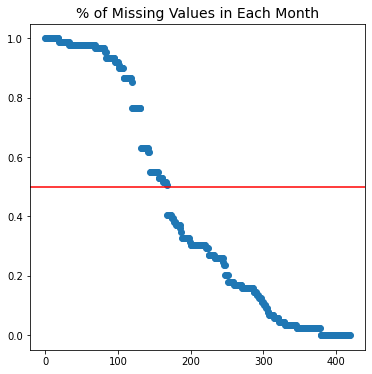

In [25]:
# Check if there is NaN in each month
month_nan_communications = pd.DataFrame(communications.isnull().sum(), columns=['nan_count'])
month_nan_communications['nan_percent'] = month_nan_communications['nan_count'] / len(communications)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(range(0, month_nan_communications.shape[0]), month_nan_communications['nan_percent'])
plt.axhline(y=0.5, color='r', linestyle='-')
plt.title("% of Missing Values in Each Month", size=14)
plt.show()

In [26]:
# Months with more than 50% missing values
month_nan_communications_50up = month_nan_communications[month_nan_communications['nan_percent'] > 0.5]
month_nan_communications_droplist = month_nan_communications_50up.index
month_nan_communications_droplist

Index(['1988-01', '1988-02', '1988-03', '1988-04', '1988-05', '1988-06',
       '1988-07', '1988-08', '1988-09', '1988-10',
       ...
       '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08',
       '2001-09', '2001-10', '2001-11', '2001-12'],
      dtype='object', length=168)

(89, 252)


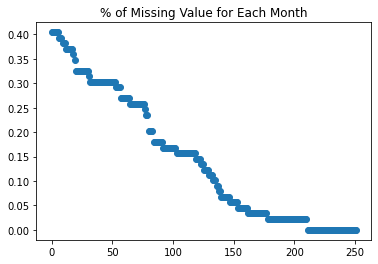

In [27]:
# Data after removing months with more than 50% missing values (data)
communications = communications.drop(month_nan_communications_droplist, axis = 1)
print(communications.shape)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(range(0, month_nan_communications[month_nan_communications['nan_percent'] < 0.5].shape[0]), month_nan_communications[month_nan_communications['nan_percent'] < 0.5]['nan_percent'])
plt.title("% of Missing Value for Each Month")
plt.show()

In [28]:
print("Data shape:", communications.shape)
print("Data size:", communications.size)

Data shape: (89, 252)
Data size: 22428


### **3.3 刪除月營收有空值的公司**

In [29]:
# Drop all the rows with NaN values
communications_final = communications.dropna(axis=0)
communications_final

,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
2314 台揚,200185.0,219179.0,320565.0,316991.0,278873.0,289556.0,276480.0,323568.0,402520.0,324067.0,...,388750.0,337985.0,353626.0,334978.0,421381.0,431594.0,448085,400957,410812,408807
2321 東訊,601938.0,500766.0,652376.0,605152.0,732126.0,752440.0,768631.0,770670.0,791223.0,724319.0,...,92540.0,85007.0,86836.0,90248.0,76205.0,90190.0,80035,65974,81973,81299
2332 友訊,1593241.0,1101455.0,1340046.0,1178485.0,1301377.0,1149293.0,1178419.0,1456867.0,1523637.0,1521610.0,...,1543114.0,1293585.0,1389326.0,1474090.0,1404034.0,1447895.0,1633066,1560899,1546963,1313864
2345 智邦,1404236.0,1410164.0,1468723.0,1450569.0,1315885.0,1151603.0,1210294.0,1307091.0,1510895.0,1515915.0,...,6749720.0,5625973.0,6156162.0,6914045.0,6840989.0,6391814.0,7348530,6610791,6817141,8770217
2412 中華電,14684335.0,14773959.0,13017734.0,14767374.0,14227480.0,14794304.0,14667474.0,15781728.0,15233415.0,14498562.0,...,17323389.0,17602247.0,17445703.0,17387760.0,17184646.0,17337298.0,18986768,19230091,19309438,20961444
2419 仲琦,174049.0,153933.0,236625.0,103103.0,211497.0,288336.0,255922.0,162417.0,380930.0,315423.0,...,908498.0,779427.0,887599.0,1374598.0,937781.0,1018128.0,1206809,1156453,1139484,1379441
2439 美律,63506.0,54579.0,72553.0,55635.0,48128.0,66725.0,130000.0,62837.0,77622.0,145000.0,...,2189938.0,2113643.0,2866873.0,3033457.0,3290225.0,3716353.0,4074768,4224308,3124607,3032043
2444 兆勁,301506.0,217104.0,351221.0,300591.0,395498.0,349296.0,314932.0,212805.0,234230.0,283007.0,...,183595.0,157899.0,128549.0,109197.0,113399.0,150337.0,141019,186453,240203,193234
2450 神腦,847340.0,926119.0,1100852.0,984768.0,1092556.0,835336.0,1063034.0,1349116.0,1088702.0,1085038.0,...,2898335.0,2422175.0,2291321.0,2258342.0,2393763.0,2512334.0,2718019,2869190,2827687,2795633


In [30]:
# Check if there is NaN
communications_final.isnull().sum().sum()

0

In [31]:
print("Data shape:", communications_final.shape)
print("Data size:", communications_final.size)

Data shape: (53, 252)
Data size: 13356


### **3.4 刪除任何擁有月營收小於等於 0 的公司**

In [32]:
communications_final = communications_final[communications_final > 0].dropna(axis=0)
print("Data shape:", communications_final.shape)
print("Data size:", communications_final.size)

Data shape: (51, 252)
Data size: 12852


## **4. Final Data**

【**月營收盈餘**】

資料期間：2015年1月至2022年12月（共96個月）

資料範圍：上市、櫃公司（排除金融業、生技醫療、建材營造、DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

<br>

---

【**通信網路業-月營收盈餘**】

資料期間：2002年1月至2022年12月（共252個月）

資料範圍：上市、櫃公司（排除DR和KY公司）

資料來源：TEJ Company DB、公開資訊觀測站

<br>

In [33]:
# Output data path
output_data_path = '/content/gdrive/MyDrive/論文/資料集'

In [34]:
# 月營收盈餘
data_final.to_excel(os.path.join(output_data_path,'201501-202212上市櫃公司月營收_非金融業.xlsx'))
print("Data shape:", data_final.shape)
print("Data size:", data_final.size)
data_final

Data shape: (1308, 96)
Data size: 125568


,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,8921719.0,4823318.0,7695107.0,8468346.0,7989971.0,8545853.0,8250361.0,7397417.0,7026214.0,8081068.0,...,9971650.0,8319342.0,7733787.0,9145989.0,10102468.0,10689860.0,10404901.0,11368096,9674576.0,12584154.0
1102 亞泥,6851825.0,3279346.0,5274419.0,5767824.0,5623713.0,5516532.0,5746639.0,5512417.0,5546527.0,5901983.0,...,8160414.0,8710220.0,8000427.0,7776413.0,7864622.0,7069221.0,6994078.0,7601097,8306062.0,8340507.0
1103 嘉泥,310280.0,160324.0,200719.0,273126.0,320563.0,143719.0,175596.0,184087.0,189109.0,321446.0,...,220463.0,168089.0,163521.0,183177.0,178825.0,182371.0,205264.0,209429,221763.0,228644.0
1104 環泥,520536.0,335531.0,471332.0,447811.0,371720.0,411286.0,412816.0,376087.0,423675.0,461991.0,...,591593.0,638493.0,537082.0,573028.0,580420.0,605512.0,597159.0,634981,631827.0,725055.0
1108 幸福,518826.0,341533.0,431529.0,432670.0,471084.0,441613.0,463001.0,329405.0,340734.0,396102.0,...,345612.0,335518.0,332258.0,334113.0,326691.0,390053.0,346635.0,401202,383773.0,418326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951 皇田,284990.0,251041.0,279617.0,333189.0,321941.0,300731.0,289975.0,300810.0,347401.0,333945.0,...,374229.0,302262.0,323433.0,371791.0,337581.0,468608.0,464373.0,432835,500111.0,506796.0
9955 佳龍,301850.0,131575.0,325762.0,152812.0,262623.0,193277.0,102874.0,172944.0,172431.0,177217.0,...,96200.0,101850.0,95096.0,80726.0,85625.0,81881.0,79179.0,80630,91270.0,84115.0
9958 世紀鋼,200493.0,217812.0,272212.0,194423.0,235272.0,271207.0,184345.0,272110.0,256634.0,282106.0,...,626104.0,401960.0,673479.0,665459.0,651699.0,757968.0,903198.0,911834,944060.0,1082675.0


In [35]:
# 通信網路業
communications_final.to_excel(os.path.join(output_data_path,'200201-202212上市櫃公司月營收_通信網路業.xlsx'))
print("Data shape:", communications_final.shape)
print("Data size:", communications_final.size)
communications_final

Data shape: (51, 252)
Data size: 12852


,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
公司,,,,,,,,,,,,,,,,,,,,,
2314 台揚,200185.0,219179.0,320565.0,316991.0,278873.0,289556.0,276480.0,323568.0,402520.0,324067.0,...,388750.0,337985.0,353626.0,334978.0,421381.0,431594.0,448085,400957,410812,408807
2321 東訊,601938.0,500766.0,652376.0,605152.0,732126.0,752440.0,768631.0,770670.0,791223.0,724319.0,...,92540.0,85007.0,86836.0,90248.0,76205.0,90190.0,80035,65974,81973,81299
2332 友訊,1593241.0,1101455.0,1340046.0,1178485.0,1301377.0,1149293.0,1178419.0,1456867.0,1523637.0,1521610.0,...,1543114.0,1293585.0,1389326.0,1474090.0,1404034.0,1447895.0,1633066,1560899,1546963,1313864
2345 智邦,1404236.0,1410164.0,1468723.0,1450569.0,1315885.0,1151603.0,1210294.0,1307091.0,1510895.0,1515915.0,...,6749720.0,5625973.0,6156162.0,6914045.0,6840989.0,6391814.0,7348530,6610791,6817141,8770217
2412 中華電,14684335.0,14773959.0,13017734.0,14767374.0,14227480.0,14794304.0,14667474.0,15781728.0,15233415.0,14498562.0,...,17323389.0,17602247.0,17445703.0,17387760.0,17184646.0,17337298.0,18986768,19230091,19309438,20961444
2419 仲琦,174049.0,153933.0,236625.0,103103.0,211497.0,288336.0,255922.0,162417.0,380930.0,315423.0,...,908498.0,779427.0,887599.0,1374598.0,937781.0,1018128.0,1206809,1156453,1139484,1379441
2439 美律,63506.0,54579.0,72553.0,55635.0,48128.0,66725.0,130000.0,62837.0,77622.0,145000.0,...,2189938.0,2113643.0,2866873.0,3033457.0,3290225.0,3716353.0,4074768,4224308,3124607,3032043
2444 兆勁,301506.0,217104.0,351221.0,300591.0,395498.0,349296.0,314932.0,212805.0,234230.0,283007.0,...,183595.0,157899.0,128549.0,109197.0,113399.0,150337.0,141019,186453,240203,193234
2450 神腦,847340.0,926119.0,1100852.0,984768.0,1092556.0,835336.0,1063034.0,1349116.0,1088702.0,1085038.0,...,2898335.0,2422175.0,2291321.0,2258342.0,2393763.0,2512334.0,2718019,2869190,2827687,2795633
